# **Colab setup and installing Libraries**

In [1]:
# # Install required packages
# !pip install -q pandas numpy scikit-learn matplotlib seaborn h2o h2o_wave gradio shap

# # Upgrade h2o to full all functionalities
# !pip install -U "h2o[all]"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 kB 6.2 MB/s eta 0:00:00


# **Importing the Libraries**

In [39]:
# Imports
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import gradio as gr
import os
import io
import re

# **Intializing the H2O Cluster**

In [3]:
# Initialize H2O cluster
h2o.init()
print("H2O cluster initialized!")

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.28" 2025-07-15; OpenJDK Runtime Environment (build 11.0.28+6-post-Ubuntu-1ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.28+6-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpw881x801
  JVM stdout: /tmp/tmpw881x801/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpw881x801/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,4 months and 10 days
H2O_cluster_name:,H2O_from_python_unknownUser_pgb6m7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


H2O cluster initialized!


In [27]:
# Load the dataset
df = pd.read_csv('Cars_2025.csv', encoding='latin1')
print(df.shape)

(1218, 11)


In [28]:
# Basic info and missing values
print("Data Types:\n", df.dtypes)

Data Types:
 Company Names                object
Cars Names                   object
Engines                      object
CC/Battery Capacity          object
HorsePower                   object
Total Speed                  object
Performance(0 - 100 )KM/H    object
Cars Prices                  object
Fuel Types                   object
Seats                        object
Torque                       object
dtype: object


In [29]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


In [34]:
df.isnull().sum()

,0
Company Names,0
Cars Names,0
Engines,0
CC/Battery Capacity,3
HorsePower,0
Total Speed,0
Performance(0 - 100 )KM/H,6
Cars Prices,0
Fuel Types,0
Seats,0


In [35]:
df.dropna(inplace=True)

In [36]:
df_duplicates = df.duplicated().sum()
print(f"Duplicates before dropping: {df_duplicates}")

df.drop_duplicates(inplace=True)
print(f"Duplicates after dropping: {df.duplicated().sum()}")

Duplicates before dropping: 4
Duplicates after dropping: 0


In [37]:
for col in df.columns:
    print(f"\n===== Value Counts for '{col}' =====")
    print(df[col].value_counts(dropna=False).head(10))
    print(f"Total unique values: {df[col].nunique()}")


===== Value Counts for 'Company Names' =====
Company Names
Nissan        148
Volkswagen    107
Porsche        96
Mazda          86
GMC            59
Chevrolet      57
Mitsubishi     56
Peugeot        54
Kia            54
Ford           54
Name: count, dtype: int64
Total unique values: 37

===== Value Counts for 'Cars Names' =====
Cars Names
Mistral                      2
911 Carrera 4                2
Panamera Platinum Edition    2
Polo BlueMotion              2
MIRAI                        2
Malibu Premier               2
NX Coupe                     2
KA+                          2
200SX                        2
Macan T                      2
Name: count, dtype: int64
Total unique values: 1193

===== Value Counts for 'Engines' =====
Engines
I4                      64
V12                     51
V6                      39
Inline-4                38
V8                      34
Dual Electric Motors    23
2.0L Inline-4           20
1.6L Inline-4           19
Electric Motor          19
5.6

# **Cleaning the Dataset**

In [41]:
df['Fuel Types'] = df['Fuel Types'].str.lower().str.strip()
df['Fuel Types'] = df['Fuel Types'].replace({
    'plug in hyrbrid': 'plug-in hybrid',
    'petrol/diesel': 'petrol & diesel',
    'diesel/petrol': 'petrol & diesel',
    'petrol, diesel': 'petrol & diesel',
    'petrol/hybrid': 'hybrid',
    'hybrid (petrol)': 'hybrid',
    'hybrid/petrol': 'hybrid',
    'petrol/ev': 'hybrid',
    'hybrid/electric': 'hybrid',
    'hybrid (gas + electric)': 'hybrid',
    'gas / hybrid': 'hybrid',
    'petrol, hybrid': 'hybrid',
    'petrol/awd': 'petrol',
    'cng/petrol': 'cng'
})

def parse_price(value):
    if isinstance(value, str):
        nums = re.findall(r'\d[\d,]*', value)
        if len(nums) == 1:
            return float(nums[0].replace(',', ''))
        elif len(nums) == 2:
            return (float(nums[0].replace(',', '')) + float(nums[1].replace(',', ''))) / 2
    return np.nan

df['Price_USD'] = df['Cars Prices'].apply(parse_price)

df['HorsePower_clean'] = df['HorsePower'].str.lower().str.extract(r'(\d+)').astype(float)

df['TopSpeed_kmh'] = df['Total Speed'].str.lower().str.extract(r'(\d+)').astype(float)

df['Acceleration_0_100_sec'] = df['Performance(0 - 100 )KM/H'].str.lower().str.extract(r'([\d\.]+)').astype(float)

df['CC_clean'] = df['CC/Battery Capacity'].str.lower().str.replace(',', '').str.extract(r'(\d+)').astype(float)

df['Torque_Nm'] = df['Torque'].str.extract(r'(\d+)').astype(float)

def parse_seats(val):
    try:
        if isinstance(val, str):
            nums = [int(s) for s in re.findall(r'\d+', val)]
            if len(nums) == 1:
                return nums[0]
            elif len(nums) >= 2:
                return round(sum(nums) / len(nums))
        return int(val)
    except:
        return np.nan

df['Seats_clean'] = df['Seats'].apply(parse_seats)

df_cleaned = df[[
    'Company Names', 'Cars Names', 'Engines', 'Fuel Types',
    'CC_clean', 'HorsePower_clean', 'TopSpeed_kmh', 'Acceleration_0_100_sec',
    'Price_USD', 'Torque_Nm', 'Seats_clean'
]].copy()

df_cleaned.rename(columns={
    'CC_clean': 'Engine_CC',
    'HorsePower_clean': 'HorsePower_hp',
    'TopSpeed_kmh': 'TopSpeed_kmh',
    'Acceleration_0_100_sec': 'Acceleration_sec',
    'Torque_Nm': 'Torque_Nm',
    'Seats_clean': 'Seats'
}, inplace=True)

In [43]:
df_cleaned['Engine_CC'].fillna(df_cleaned['Engine_CC'].mean(), inplace=True)


/tmp/ipython-input-191454644.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Engine_CC'].fillna(df_cleaned['Engine_CC'].mean(), inplace=True)


In [44]:
df_cleaned.drop(columns=['Cars Names'], inplace=True)

In [50]:
features = ['Company Names','Engines', 'Fuel Types', 'Engine_CC',
            'HorsePower_hp', 'TopSpeed_kmh', 'Acceleration_sec', 'Torque_Nm', 'Seats']
target = 'Price_USD'

In [47]:
# Convert Pandas DataFrame to H2OFrame
h2o_df = h2o.H2OFrame(df_cleaned)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [48]:
# Train-test split 70-30
train, test = h2o_df.split_frame(ratios=[0.7], seed=42)

print(f"Train rows: {train.nrows}, Test rows: {test.nrows}")


Train rows: 849, Test rows: 357


# **Train H2O AutoML Regression Model**

In [51]:
# Initialize AutoML for regression task
aml = H2OAutoML(
    max_runtime_secs=300,
    seed=42,
    nfolds=5,
    max_models=20,
    stopping_metric="RMSE",
    balance_classes=False,
    verbosity='info'
)

# Train model
aml.train(x=features, y=target, training_frame=train, leaderboard_frame=test)

best_model = aml.leader
print(f"Best model: {best_model.model_id}")


AutoML progress: |
14:40:50.147: Project: AutoML_1_20250807_144050
14:40:50.149: Setting stopping tolerance adaptively based on the training frame: 0.03431991115272901
14:40:50.149: Build control seed: 42
14:40:50.150: training frame: Frame key: AutoML_1_20250807_144050_training_py_2_sid_9535    cols: 10    rows: 849  chunks: 1    size: 59085  checksum: 3495241534547698092
14:40:50.152: validation frame: NULL
14:40:50.156: leaderboard frame: Frame key: py_3_sid_9535    cols: 10    rows: 357  chunks: 1    size: 47876  checksum: -8896209438445104002
14:40:50.156: blending frame: NULL
14:40:50.157: response column: Price_USD
14:40:50.157: fold column: null
14:40:50.157: weights column: null
14:40:50.193: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w

# **SHAP Explainability Visualization**

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


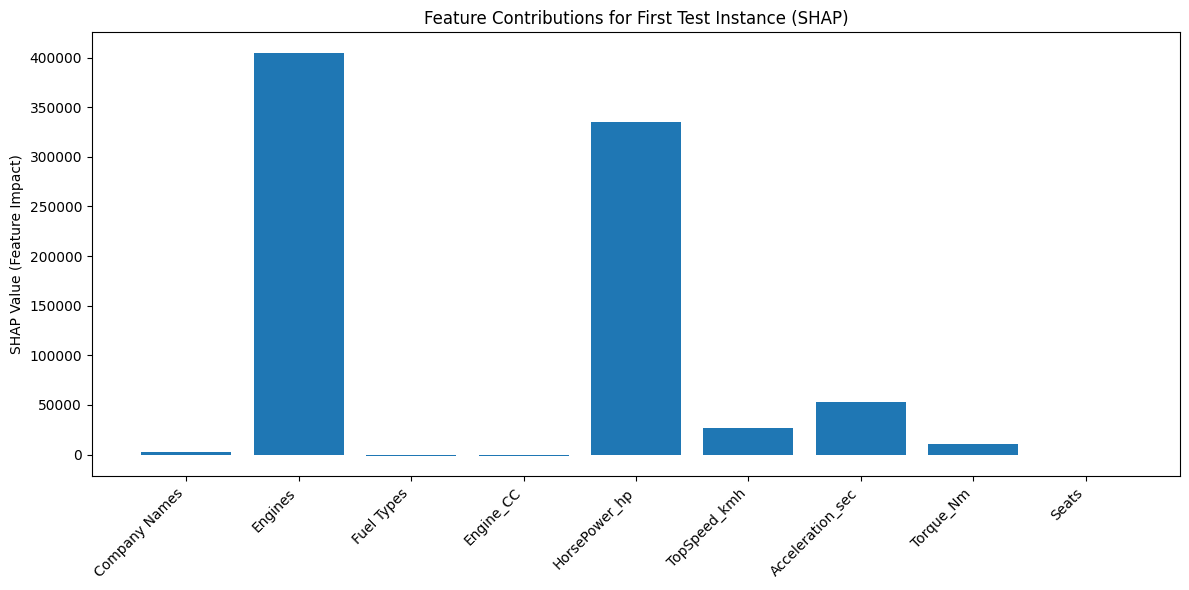

In [52]:
# Get prediction contributions (SHAP) for 5 test samples
try:
    num_instances = min(5, test.nrows)
    explanation_frame = best_model.predict_contributions(test[0:num_instances, :])
    shap_values = explanation_frame.as_data_frame().iloc[:, :-1].values  # drop bias term

    # Bar plot for first test instance feature contributions
    plt.figure(figsize=(12,6))
    plt.bar(features, shap_values[0])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('SHAP Value (Feature Impact)')
    plt.title('Feature Contributions for First Test Instance (SHAP)')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("SHAP explanation failed:", e)


In [53]:
model_path = h2o.save_model(model=best_model, path="./", force=True)
print(f"Model saved to: {model_path}")


Model saved to: /content/GBM_grid_1_AutoML_1_20250807_144050_model_2
